In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

weekly_demand = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train.csv")
weekly_demand

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [2]:
fulfilment_center = pd.read_csv(r"C:\Users\panda4\Downloads\fulfilment_center_info.csv")
fulfilment_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
5,64,553,77,TYPE_A,4.4
6,129,593,77,TYPE_A,3.9
7,139,693,34,TYPE_C,2.8
8,88,526,34,TYPE_A,4.1
9,143,562,77,TYPE_B,3.8


In [4]:
meal_info = pd.read_csv(r"C:\Users\panda4\Downloads\meal_info.csv")
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [5]:
data = pd.merge(weekly_demand, fulfilment_center, how='inner', on='center_id')
train_data = pd.merge(data, meal_info, how='inner', on='meal_id')
train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


[]

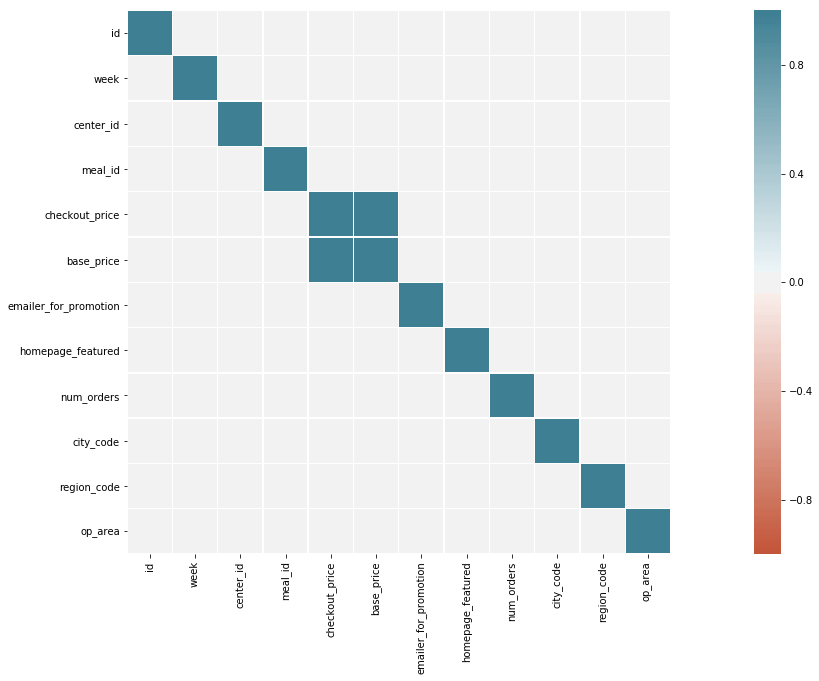

In [7]:
corr = train_data.corr()
plt.figure(figsize=(30,10))
ax = sns.heatmap(
    corr>0.85, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [9]:
center_type_dummies = pd.get_dummies(train_data['center_type'], drop_first=True)
center_type_dummies.columns

Index(['TYPE_B', 'TYPE_C'], dtype='object')

In [10]:
print(train_data.category.nunique())
category_dummies = pd.get_dummies(train_data['category'], drop_first=True)
category_dummies.columns
 

14


Index(['Biryani', 'Desert', 'Extras', 'Fish', 'Other Snacks', 'Pasta', 'Pizza',
       'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters'],
      dtype='object')

In [11]:
print(train_data.cuisine.unique())
cuisine_dummies = pd.get_dummies(train_data['cuisine'], drop_first=True)
cuisine_dummies.columns

['Thai' 'Indian' 'Italian' 'Continental']


Index(['Indian', 'Italian', 'Thai'], dtype='object')

In [12]:
data = pd.concat([train_data, center_type_dummies, category_dummies, cuisine_dummies], axis=1)
X = data.drop(['id','center_id','meal_id','center_type','category','cuisine','num_orders', 'Biryani', 'Desert', 'Extras', 'Fish', 'Other Snacks', 'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters', 'TYPE_B', 'TYPE_C', 'Thai', 'Indian', 'Italian', 'emailer_for_promotion', 'homepage_featured', 'checkout_price' ], axis=1)
X

,week,base_price,city_code,region_code,op_area
0,1,152.29,647,56,2.0
1,2,152.29,647,56,2.0
2,3,133.92,647,56,2.0
3,4,134.86,647,56,2.0
4,5,147.50,647,56,2.0
5,6,146.53,647,56,2.0
6,7,146.53,647,56,2.0
7,8,145.53,647,56,2.0
8,9,134.83,647,56,2.0
9,10,143.56,647,56,2.0


In [13]:
y = data['num_orders']
y

0         177
1         323
2          96
3         163
4         215
5         285
6         148
7         135
8         175
9         175
10        244
11        190
12         68
13        135
14        366
15         67
16        270
17        350
18        244
19        188
20        136
21        296
22        188
23        161
24         55
25        176
26        202
27        296
28        107
29        135
         ... 
456518     13
456519     67
456520     54
456521     41
456522     27
456523     14
456524     26
456525     28
456526     14
456527     53
456528     54
456529     28
456530     53
456531    121
456532    378
456533    270
456534    339
456535    107
456536     41
456537     28
456538     15
456539     41
456540    150
456541    312
456542    149
456543     13
456544     42
456545     40
456546     53
456547     27
Name: num_orders, Length: 456548, dtype: int64

In [14]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = 0.3, random_state=3)
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [15]:
y_pred = dtree.predict(X_valid)

In [16]:
count_misclassified = (y_pred != y_valid).sum()
print(count_misclassified)
accuracy = metrics.accuracy_score(y_valid, y_pred)
print(accuracy)

132866
0.029927353703500893


In [17]:
cv = KFold(n_splits=10, random_state=12)
cv

KFold(n_splits=10, random_state=12, shuffle=False)

In [18]:
fold_accuracy = []

for train_fold, valid_fold in cv.split(X):
#     print(train_fold)
#     print(valid_fold)
    train = X.loc[train_fold]
    valid = X.loc[valid_fold]
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, y = train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)

print(fold_accuracy)
print(sum(fold_accuracy)/len(fold_accuracy))

[0.016493264702661263, 0.013777242361187164, 0.006001533238418574, 0.01708465666411127, 0.02624028036359654, 0.012769685686124192, 0.028496331179498412, 0.05228343007337641, 0.028737898103123494, 0.027511280501160907]
0.02293956028732582


In [97]:
test_data = pd.read_csv(r"C:\Users\panda4\Downloads\test_QoiMO9B.csv")
test_data
data = pd.merge(test_data, fulfilment_center, how='inner', on='center_id')
test_data = pd.merge(data, meal_info, how='inner', on='meal_id')
test_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
5,1342607,152,55,1885,159.11,160.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
6,1358429,153,55,1885,159.11,158.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
7,1475006,154,55,1885,160.11,158.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
8,1009709,155,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
9,1460444,146,24,1885,158.11,160.11,0,1,614,85,TYPE_B,3.6,Beverages,Thai


In [98]:
center_type_dummies_test = pd.get_dummies(test_data['center_type'], drop_first=True)
center_type_dummies_test

,TYPE_B,TYPE_C
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [99]:
print(test_data.category.nunique())
category_dummies_test = pd.get_dummies(test_data['category'], drop_first=True)
category_dummies_test

14


,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
print(test_data.cuisine.unique())
cuisine_dummies_test = pd.get_dummies(test_data['cuisine'], drop_first=True)
cuisine_dummies_test

['Thai' 'Indian' 'Italian' 'Continental']


,Indian,Italian,Thai
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [101]:
data_test = pd.concat([test_data, center_type_dummies_test, category_dummies_test, cuisine_dummies_test], axis=1)
X_test = data_test.drop(['id','center_id','meal_id','center_type','category','cuisine'], axis=1)
X_test
# y_train = data_test['num_orders']
# y_train

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,TYPE_B,TYPE_C,...,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Indian,Italian,Thai
0,146,158.11,159.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,147,159.11,159.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,149,157.14,158.14,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,150,159.14,157.14,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,151,160.11,159.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,152,159.11,160.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,153,159.11,158.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,154,160.11,158.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,155,158.11,159.11,0,0,647,56,2.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,146,158.11,160.11,0,1,614,85,3.6,1,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
regressor = DecisionTreeRegressor(criterion='mse', random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
pred = pd.DataFrame(y_pred, columns=['num_orders'])
pred

,num_orders
0,135.0
1,54.0
2,121.0
3,54.0
4,54.0
5,54.0
6,54.0
7,54.0
8,135.0
9,431.0
